# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**⚠️ DISCLAIMER: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Manual verification is recommended before drawing scientific conclusions from this analysis.**

## Overview

This notebook explores Dandiset 000690 version 0.250326.0015, which contains data from the Allen Institute Openscope - Vision2Hippocampus project. The dataset investigates how visual information is processed from the primary visual cortex through higher visual areas and into the hippocampus in mice.

The project uses Neuropixel probes to record neural activity in different brain regions while presenting visual stimuli to mice. The visual stimuli include both simple patterns (like moving bars of light) and more complex natural scenes (such as videos of animals).

Link to the Dandiset: [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

## Required Packages

The following packages are required to run this notebook:
- `pynwb`: For working with Neurodata Without Borders (NWB) files
- `h5py`: For handling HDF5 files
- `remfile`: For streaming remote files
- `numpy`: For numerical operations
- `matplotlib`: For visualization
- `seaborn`: For enhanced visualization
- `pandas`: For data manipulation

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice

# Set seaborn style for better visualization
import seaborn as sns
sns.set_theme()

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Understanding the Dataset Structure

The Dandiset contains:

1. **Main NWB files**: These contain session-level information, including references to probe recordings, stimulus information, and behavioral data.

2. **Probe-specific NWB files**: These contain electrophysiological recordings from individual Neuropixel probes, including:
   - Local field potentials (LFP)
   - Spiking activity of individual neurons (units)

3. **Image NWB files**: These contain visual stimuli presented during the experiment.

Let's examine one of the main NWB files to get a better understanding of the dataset structure.

In [3]:
# Load a main session NWB file
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
print(f"Loading NWB file from {url}")

remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic session information
print(f"Session ID: {nwb.session_id}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age} ({nwb.subject.age_in_days} days)")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")

Loading NWB file from https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 1298465622
Session description: Data and metadata for an Ecephys session
Session start time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Subject age: P82D (82.0 days)
Subject species: Mus musculus
Subject sex: M


## Exploring Running Wheel Data

The dataset includes running wheel data that records the mouse's locomotion during the experiment. This is important because neural activity in visual areas can be modulated by locomotion.

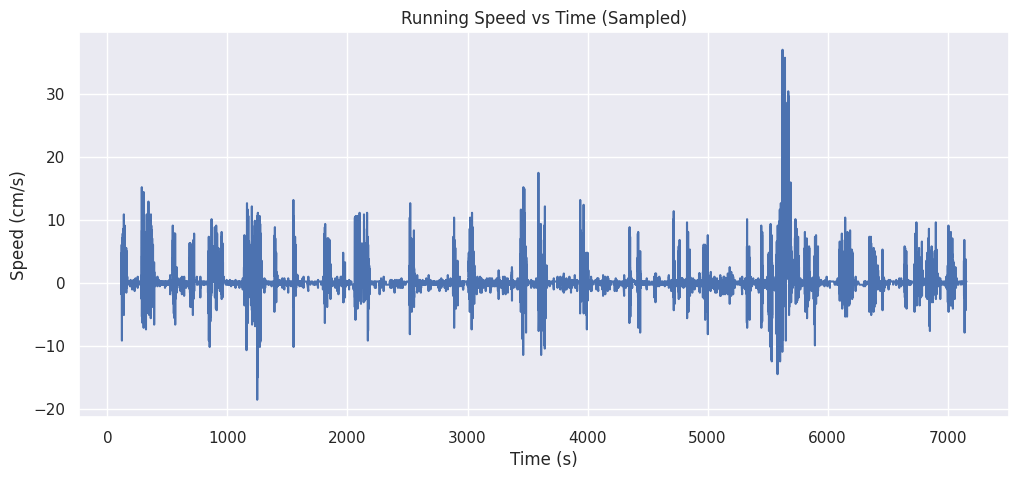

Mean running speed: 0.99 cm/s
Median running speed: 0.25 cm/s
Maximum running speed: 68.58 cm/s


In [4]:
# Extract running speed data
running_speed_data = nwb.processing['running'].data_interfaces['running_speed']
running_speeds = running_speed_data.data[:]
running_timestamps = running_speed_data.timestamps[:]

# Sample a subset of the data for plotting (10% of the data)
sample_size = len(running_speeds) // 10
sample_indices = np.linspace(0, len(running_speeds)-1, sample_size, dtype=int)
sampled_speeds = running_speeds[sample_indices]
sampled_timestamps = running_timestamps[sample_indices]

# Plot running speed
plt.figure(figsize=(12, 5))
plt.plot(sampled_timestamps, sampled_speeds)
plt.title('Running Speed vs Time (Sampled)')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.grid(True)
plt.show()

# Calculate basic statistics
mean_speed = np.mean(running_speeds)
median_speed = np.median(running_speeds)
max_speed = np.max(running_speeds)

print(f"Mean running speed: {mean_speed:.2f} cm/s")
print(f"Median running speed: {median_speed:.2f} cm/s")
print(f"Maximum running speed: {max_speed:.2f} cm/s")

## Exploring Visual Stimuli

The dataset includes various visual stimuli presented to the mice. Let's explore the types of stimuli used in the experiment.

In [5]:
# Load the image NWB file
url_image = "https://api.dandiarchive.org/api/assets/cbc64387-19b9-494a-a8fa-04d3207f7ffb/download/"
print(f"Loading image NWB file from {url_image}")

remote_file_image = remfile.File(url_image)
h5_file_image = h5py.File(remote_file_image)
io_image = pynwb.NWBHDF5IO(file=h5_file_image)
nwb_image = io_image.read()

# List available stimulus templates
print("Available stimulus templates:")
stim_types = []
for key in nwb_image.stimulus_template.keys():
    template = nwb_image.stimulus_template[key]
    if hasattr(template, 'data'):
        shape = template.data.shape
        stim_types.append((key, shape))
        print(f"  {key}: shape={shape}")

Loading image NWB file from https://api.dandiarchive.org/api/assets/cbc64387-19b9-494a-a8fa-04d3207f7ffb/download/


Available stimulus templates:
  Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240, 3)
  Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240)
  GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240, 3)
  Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240)
  SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240)
  SAC_Wd15_Vel2_Bndry1_Cntst1_loop_presentations: shape=(960, 540, 240)
  SAC_Wd15_Vel2_Bndry2_Cntst0_loop_presentations: shape=(960, 540, 284)
  SAC_Wd15_Vel2_Bndry2_Cntst0_oneway_presentations: shape=(960, 540, 142)
  SAC_Wd15_Vel2_Bndry3_Cntst0_loop_presentations: shape=(960, 540, 372)
  SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 960)
  SAC_Wd45_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240)
  UD_Wd15_Vel2_Bndry1_Cntst0_loop_presentations: shape=(960, 540, 240)
  acurl_Wd15_Vel2_Bndry1_Cntst0_oneway_presentations: shape=(960, 540, 120)
  curl_Wd1

### Visual Stimulus Categories

The dataset includes two main types of visual stimuli:

1. **Simple visual motion stimuli**: These are basic stimuli like bars of light with various parameters:
   - SAC (Standard): Standard white bar on black background
   - Cntst0/Cntst1: Different contrast levels
   - Wd15/Wd45: Bars of different widths (15° vs. 45°)
   - Vel2/Vel8: Different speeds (covering screen in 2s vs. 8s)
   - Bndry1/Bndry2/Bndry3: Different boundary conditions

2. **Complex natural stimuli**: These are videos of natural scenes, including:
   - Eagles swooping
   - Crickets on a rock
   - Snake on a road
   - Squirrels and mice

Let's examine one of the simple stimuli and one of the natural stimuli.

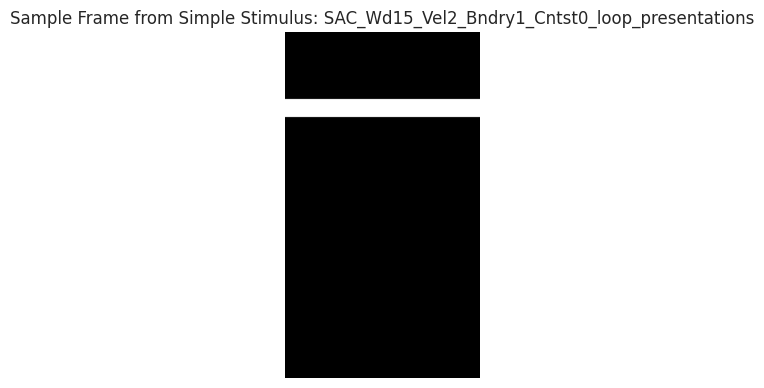

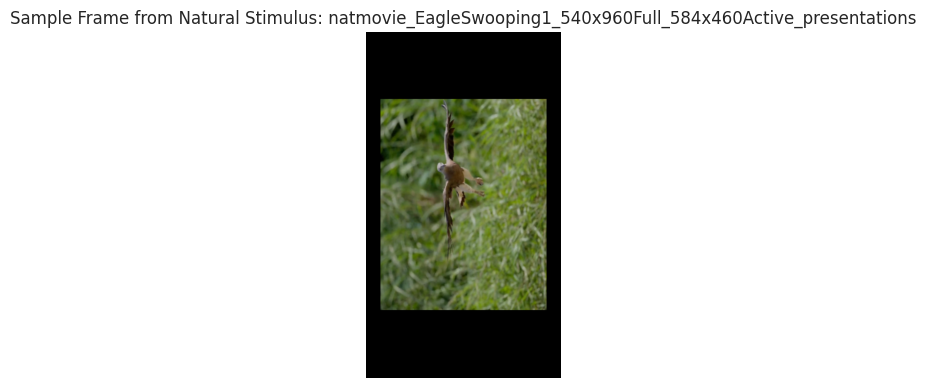

In [6]:
# Select a simple stimulus (SAC) and extract a representative frame
simple_stim_key = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'
if simple_stim_key in nwb_image.stimulus_template:
    simple_stim = nwb_image.stimulus_template[simple_stim_key]
    simple_frame = simple_stim.data[:, :, 0]
    
    plt.figure(figsize=(8, 4.5))
    plt.imshow(simple_frame, cmap='gray')
    plt.title(f'Sample Frame from Simple Stimulus: {simple_stim_key}')
    plt.axis('off')
    plt.show()

# Select a natural stimulus and extract a representative frame
nat_stim_key = 'natmovie_EagleSwooping1_540x960Full_584x460Active_presentations'
if nat_stim_key in nwb_image.stimulus_template:
    nat_stim = nwb_image.stimulus_template[nat_stim_key]
    nat_frame = nat_stim.data[:, :, 0, :]
    
    plt.figure(figsize=(8, 4.5))
    plt.imshow(nat_frame)
    plt.title(f'Sample Frame from Natural Stimulus: {nat_stim_key}')
    plt.axis('off')
    plt.show()

### Stimulus Presentation Timing

Let's examine when the stimuli were presented during the experiment.

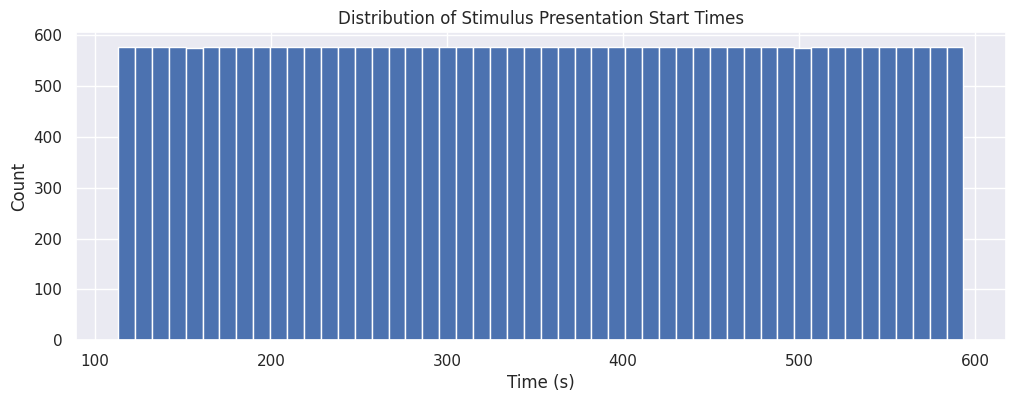

Stimulus: SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations
Number of presentations: 28800
Mean duration: 0.0167s
Time range: 113.10s - 593.54s


In [7]:
# Get stimulus presentation information for one stimulus type
stim_key = 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'
if stim_key in nwb.intervals:
    stim_presentations = nwb.intervals[stim_key]
    start_times = stim_presentations.start_time[:]
    stop_times = stim_presentations.stop_time[:]
    
    # Calculate durations
    durations = stop_times - start_times
    
    # Plot the start times of stimulus presentations
    plt.figure(figsize=(12, 4))
    plt.hist(start_times, bins=50)
    plt.title(f'Distribution of Stimulus Presentation Start Times')
    plt.xlabel('Time (s)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()
    
    # Print statistics
    print(f"Stimulus: {stim_key}")
    print(f"Number of presentations: {len(start_times)}")
    print(f"Mean duration: {np.mean(durations):.4f}s")
    print(f"Time range: {np.min(start_times):.2f}s - {np.max(stop_times):.2f}s")

## Neural Activity Analysis

Now, let's examine the neural data recorded during the experiment. The dataset includes spiking activity from multiple brain regions, recorded with Neuropixel probes.

Unit quality counts:
  good: 2311
  noise: 453


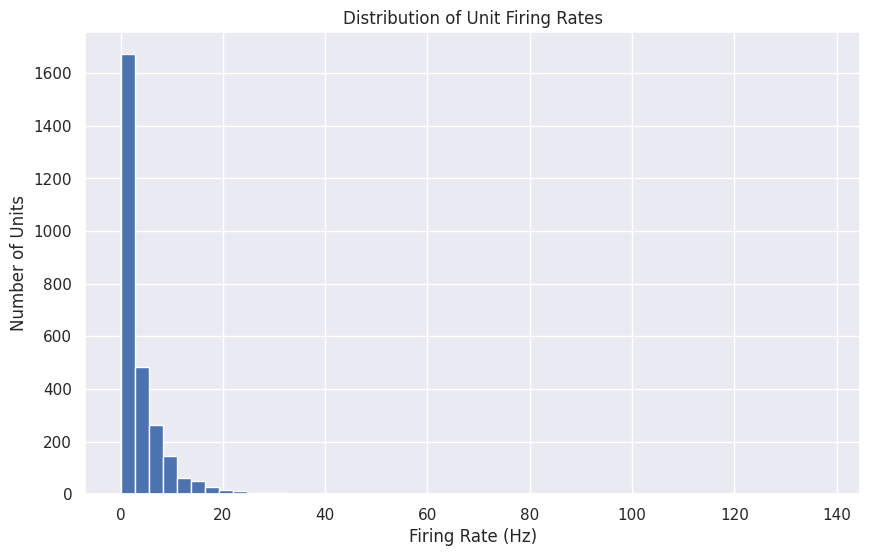

Total number of units: 2764
Mean firing rate: 3.67 Hz
Median firing rate: 1.91 Hz
Min firing rate: 0.00 Hz
Max firing rate: 137.74 Hz


In [8]:
# Get summary of units (neurons)
units = nwb.units
unit_ids = units.id[:]
firing_rates = units['firing_rate'][:]
qualities = units['quality'][:]

# Count units by quality
quality_counts = {}
for q in np.unique(qualities):
    count = np.sum(qualities == q)
    quality_counts[q] = count
    
print("Unit quality counts:")
for q, count in quality_counts.items():
    print(f"  {q}: {count}")

# Plot histogram of firing rates
plt.figure(figsize=(10, 6))
plt.hist(firing_rates, bins=50)
plt.title('Distribution of Unit Firing Rates')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.grid(True)
plt.show()

# Print summary statistics
print(f"Total number of units: {len(unit_ids)}")
print(f"Mean firing rate: {np.mean(firing_rates):.2f} Hz")
print(f"Median firing rate: {np.median(firing_rates):.2f} Hz")
print(f"Min firing rate: {np.min(firing_rates):.2f} Hz")
print(f"Max firing rate: {np.max(firing_rates):.2f} Hz")

### Analyzing a Single Neuron

Selected unit: ID=730, firing rate=38.68 Hz


Unit has 313027 spikes


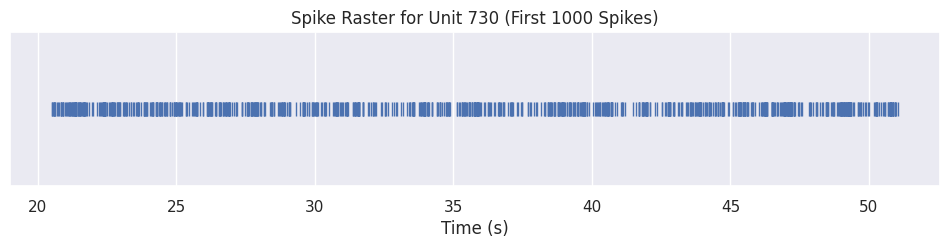

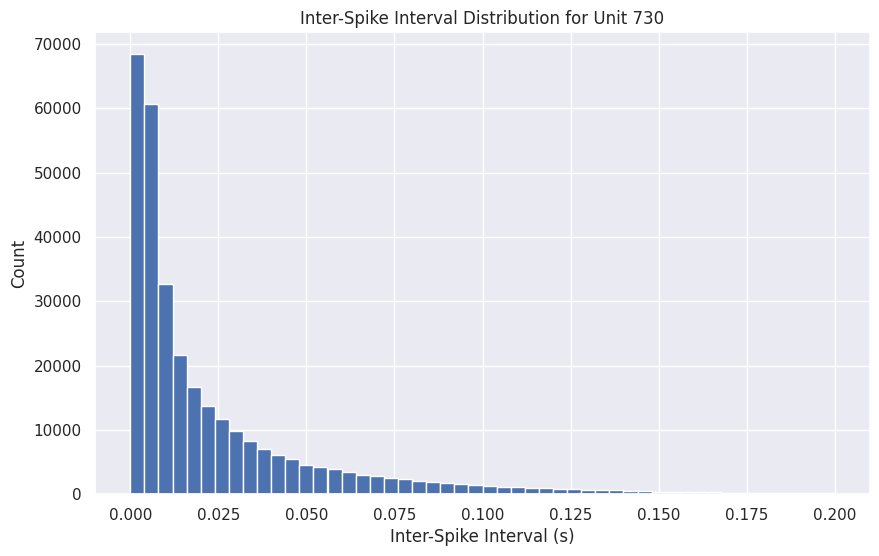

In [9]:
# Select a unit with good quality and relatively high firing rate for detail analysis
if 'good' in np.unique(qualities):
    good_mask = qualities == 'good'
    good_unit_ids = unit_ids[good_mask]
    good_firing_rates = firing_rates[good_mask]
    
    # Choose one of the higher firing rate units
    sorted_indices = np.argsort(good_firing_rates)
    high_fr_unit_idx = sorted_indices[-5]  # 5th highest firing rate
    selected_unit_id = good_unit_ids[high_fr_unit_idx]
    selected_unit_idx = np.where(unit_ids == selected_unit_id)[0][0]
    
    print(f"Selected unit: ID={selected_unit_id}, firing rate={firing_rates[selected_unit_idx]:.2f} Hz")
    
    # Get spike times for the selected unit
    unit_spike_times = units.spike_times_index[selected_unit_idx]
    
    # If the spike times are available
    if len(unit_spike_times) > 0:
        print(f"Unit has {len(unit_spike_times)} spikes")
        
        # Plot spike raster for a small time window
        sample_size = 1000
        sample_spike_times = unit_spike_times[:sample_size]
        
        plt.figure(figsize=(12, 2))
        plt.plot(sample_spike_times, np.ones_like(sample_spike_times), '|', markersize=10)
        plt.title(f'Spike Raster for Unit {selected_unit_id} (First {sample_size} Spikes)')
        plt.xlabel('Time (s)')
        plt.yticks([])
        plt.grid(True)
        plt.show()
        
        # Calculate and plot inter-spike intervals (ISIs)
        isis = np.diff(unit_spike_times)
        
        plt.figure(figsize=(10, 6))
        plt.hist(isis, bins=50, range=(0, 0.2))  # Focus on ISIs up to 200 ms
        plt.title(f'Inter-Spike Interval Distribution for Unit {selected_unit_id}')
        plt.xlabel('Inter-Spike Interval (s)')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()

### Neural Response to Visual Stimulus

Let's examine the relationship between neural activity and visual stimulus presentations.

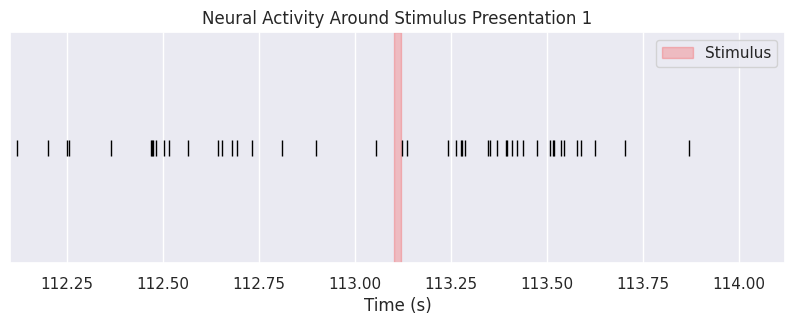

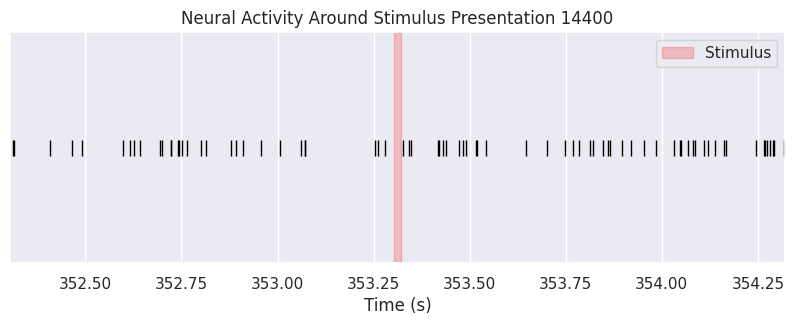

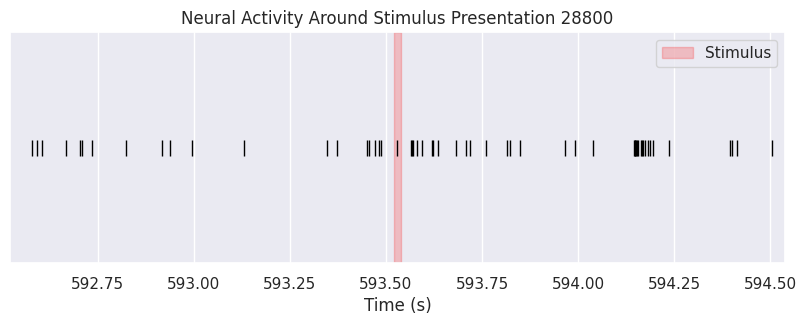

In [10]:
# Analyze neural response to stimulus for the selected unit
if 'stim_presentations' in locals() and len(unit_spike_times) > 0:
    # Select a few stimulus presentations for analysis
    num_stim = 3
    stim_indices = np.linspace(0, len(start_times)-1, num_stim, dtype=int)
    
    for i, stim_idx in enumerate(stim_indices):
        # Define a window around the stimulus presentation
        window_start = max(0, start_times[stim_idx] - 1.0)  # 1 second before stimulus
        window_stop = stop_times[stim_idx] + 1.0  # 1 second after stimulus
        
        # Find spikes within this window
        spike_mask = (unit_spike_times >= window_start) & (unit_spike_times <= window_stop)
        window_spikes = unit_spike_times[spike_mask]
        
        # Create a plot
        plt.figure(figsize=(10, 3))
        
        # Mark stimulus period
        plt.axvspan(start_times[stim_idx], stop_times[stim_idx], color='red', alpha=0.2, 
                   label='Stimulus')
        
        # Plot spikes
        plt.plot(window_spikes, np.ones_like(window_spikes), '|', markersize=12, color='black')
        
        plt.title(f'Neural Activity Around Stimulus Presentation {stim_idx+1}')
        plt.xlabel('Time (s)')
        plt.yticks([])
        plt.xlim(window_start, window_stop)
        plt.legend()
        plt.grid(True)
        plt.show()

## Accessing LFP Data from a Probe NWB File

The local field potential (LFP) data is stored in separate NWB files for each probe. Let's load and analyze LFP data from one of the probe files.

Loading probe NWB file from https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/
Neurosift link for interactive exploration: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=0.250326.0015


LFP data shape: (10117092, 95)
Number of channels: 95
Number of time points: 10117092
LFP unit: volts


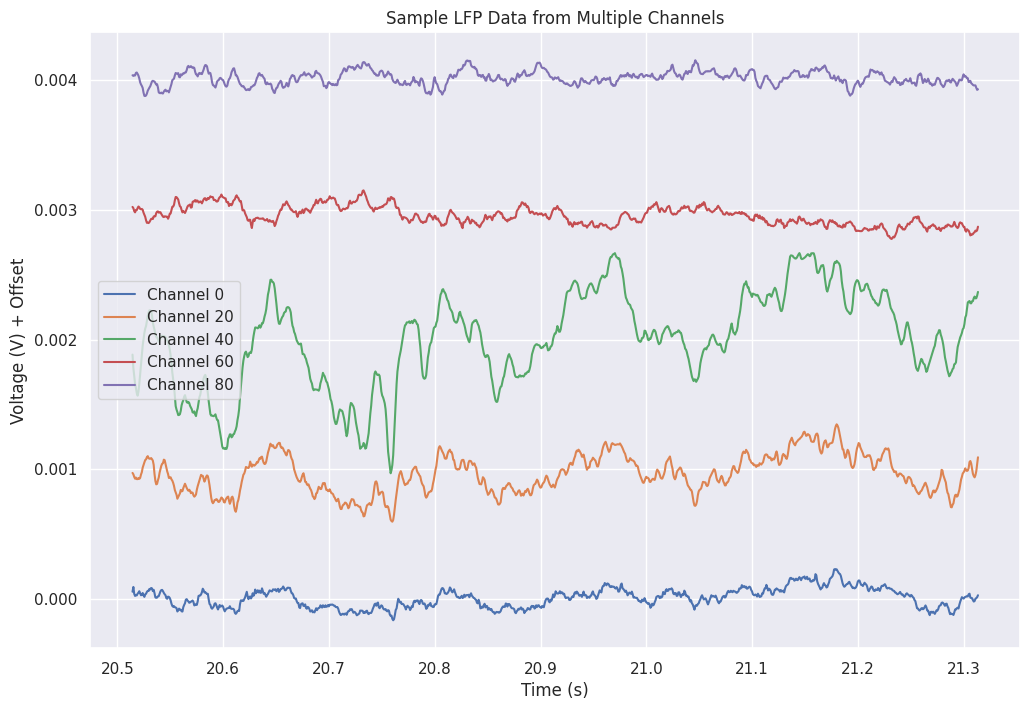

In [11]:
# Load a probe NWB file for LFP data
url_probe = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
print(f"Loading probe NWB file from {url_probe}")

# Link to neurosift for interactive exploration
neurosift_url = f"https://neurosift.app/nwb?url={url_probe}&dandisetId=000690&dandisetVersion=0.250326.0015"
print(f"Neurosift link for interactive exploration: {neurosift_url}")

remote_file_probe = remfile.File(url_probe)
h5_file_probe = h5py.File(remote_file_probe)
io_probe = pynwb.NWBHDF5IO(file=h5_file_probe)
nwb_probe = io_probe.read()

# Print basic info about the LFP data
if 'probe_0_lfp' in nwb_probe.acquisition:
    lfp_data = nwb_probe.acquisition['probe_0_lfp_data']
    
    print(f"LFP data shape: {lfp_data.data.shape}")
    print(f"Number of channels: {lfp_data.data.shape[1]}")
    print(f"Number of time points: {lfp_data.data.shape[0]}")
    print(f"LFP unit: {lfp_data.unit}")
    
    # Extract a small sample of LFP data for visualization (first 1000 time points, 5 channels)
    sample_channels = [0, 20, 40, 60, 80]  # Selecting 5 channels spread across the probe
    if all(ch < lfp_data.data.shape[1] for ch in sample_channels):
        sample_times = np.arange(1000)
        sample_lfp = lfp_data.data[sample_times, :][:, sample_channels]
        sample_timestamps = lfp_data.timestamps[sample_times]
        
        # Plot LFP data
        plt.figure(figsize=(12, 8))
        for i, ch in enumerate(sample_channels):
            # Offset each channel for visibility
            plt.plot(sample_timestamps, sample_lfp[:, i] + i*0.001, 
                     label=f'Channel {ch}')
        
        plt.title('Sample LFP Data from Multiple Channels')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V) + Offset')
        plt.grid(True)
        plt.legend()
        plt.show()

## Correlating Neural Activity with Running Behavior

Let's investigate whether there's a relationship between the mouse's running speed and neural activity.

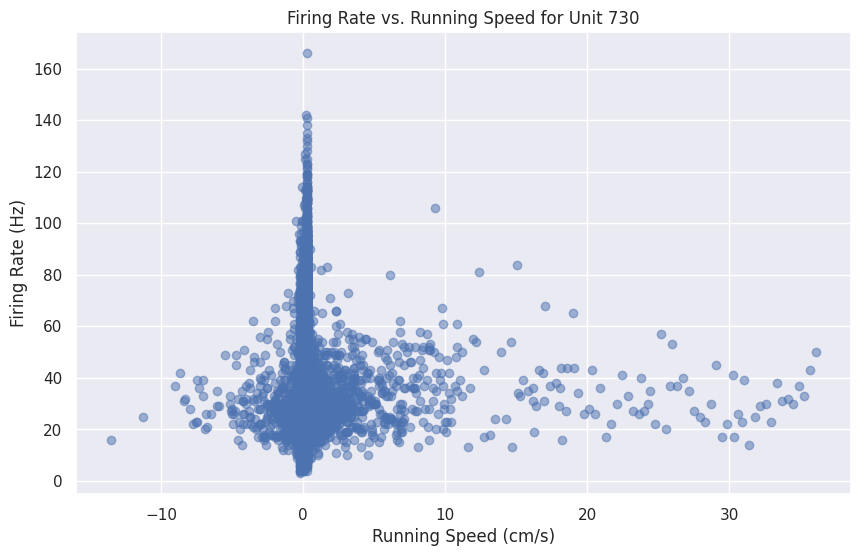

Correlation between firing rate and running speed: -0.018


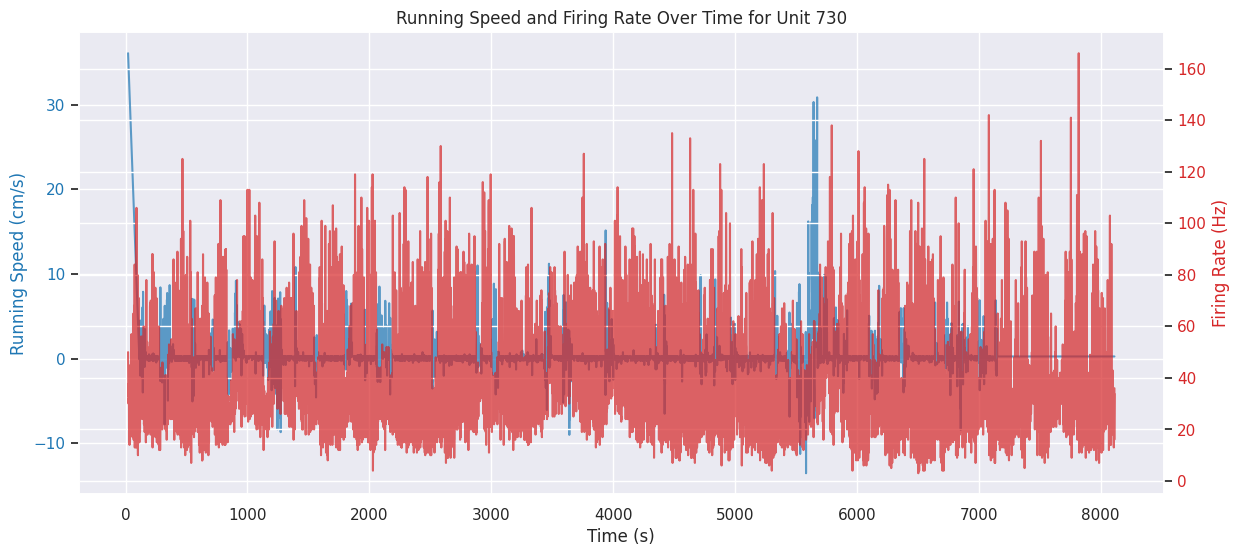

In [12]:
# Let's focus on our previously selected unit
if 'selected_unit_idx' in locals() and 'running_timestamps' in locals():
    # We'll compute firing rate over time by binning spikes
    bin_size = 1.0  # 1-second bins
    time_bins = np.arange(np.min(unit_spike_times), np.max(unit_spike_times), bin_size)
    
    # Count spikes in each bin
    spike_counts, _ = np.histogram(unit_spike_times, bins=time_bins)
    firing_rate_binned = spike_counts / bin_size  # Convert counts to rate (Hz)
    bin_centers = time_bins[:-1] + bin_size/2
    
    # Interpolate running speed to match our bin centers
    from scipy.interpolate import interp1d
    if len(running_timestamps) > 1:
        speed_interp = interp1d(running_timestamps, running_speeds, 
                              bounds_error=False, fill_value='extrapolate')
        running_speed_binned = speed_interp(bin_centers)
        
        # Create a scatter plot of firing rate vs. running speed
        plt.figure(figsize=(10, 6))
        plt.scatter(running_speed_binned, firing_rate_binned, alpha=0.5)
        plt.title(f'Firing Rate vs. Running Speed for Unit {selected_unit_id}')
        plt.xlabel('Running Speed (cm/s)')
        plt.ylabel('Firing Rate (Hz)')
        plt.grid(True)
        plt.show()
        
        # Calculate correlation
        mask = ~np.isnan(running_speed_binned) & ~np.isnan(firing_rate_binned)
        correlation = np.corrcoef(running_speed_binned[mask], firing_rate_binned[mask])[0, 1]
        print(f"Correlation between firing rate and running speed: {correlation:.3f}")
        
        # Plot firing rate and running speed over time
        fig, ax1 = plt.subplots(figsize=(14, 6))
        
        # Running speed on left y-axis
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Running Speed (cm/s)', color='tab:blue')
        ax1.plot(bin_centers, running_speed_binned, color='tab:blue', alpha=0.7)
        ax1.tick_params(axis='y', labelcolor='tab:blue')
        
        # Firing rate on right y-axis
        ax2 = ax1.twinx()
        ax2.set_ylabel('Firing Rate (Hz)', color='tab:red')
        ax2.plot(bin_centers, firing_rate_binned, color='tab:red', alpha=0.7)
        ax2.tick_params(axis='y', labelcolor='tab:red')
        
        plt.title(f'Running Speed and Firing Rate Over Time for Unit {selected_unit_id}')
        plt.grid(True)
        plt.show()

## Summary

In this notebook, we've explored Dandiset 000690, the Allen Institute Openscope - Vision2Hippocampus project. Here's a summary of our exploration:

1. **Dataset Structure**: The dataset contains multiple NWB files with the recordings from Neuropixel probes, eye tracking, visual stimuli, and behavioral data.

2. **Visual Stimuli**: The mice were presented with both simple visual stimuli (moving bars with different parameters) and complex natural scenes (videos of animals).

3. **Neural Activity**: We examined single-unit activity, looking at firing rates, spike timing patterns, and responses to visual stimuli.

4. **Local Field Potentials**: We accessed LFP data from the probe recordings, which reflects the combined activity of many neurons.

5. **Behavior**: We analyzed the mouse's running behavior and explored its relationship with neural activity.

This dataset offers rich opportunities for further analysis, such as:

- Population-level analysis of neural responses across different brain regions
- More detailed investigation of responses to different visual stimulus parameters
- Analysis of how information is transformed between visual cortex and hippocampus
- Correlation of neural activity with eye movements and running behavior
- Comparing responses to artificial stimuli vs. natural scenes

To further explore this dataset interactively, you can use the Neurosift tool with the links provided in the notebook.

## References

- [DANDI Archive](https://dandiarchive.org/)
- [Allen Institute for Brain Science](https://alleninstitute.org/)
- [Neurosift](https://neurosift.app/) for interactive data exploration